readme: this file is for exploratory analysis of CollegeMajor dataset, which can be downloaded here: https://github.com/fivethirtyeight/data/tree/master/college-majors

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from unemploy_major_analysis import UnemployedAnalysis

<h3> Task1: get the distribution of unemployment rates among major categories

there are 16 unique major categories
unique major categories:
['Agriculture & Natural Resources', 'Biology & Life Science', 'Engineering', 'Humanities & Liberal Arts', 'Communications & Journalism', 'Computers & Mathematics', 'Industrial Arts & Consumer Services', 'Education', 'Law & Public Policy', 'Interdisciplinary', 'Health', 'Social Science', 'Physical Sciences', 'Psychology & Social Work', 'Arts', 'Business']
---


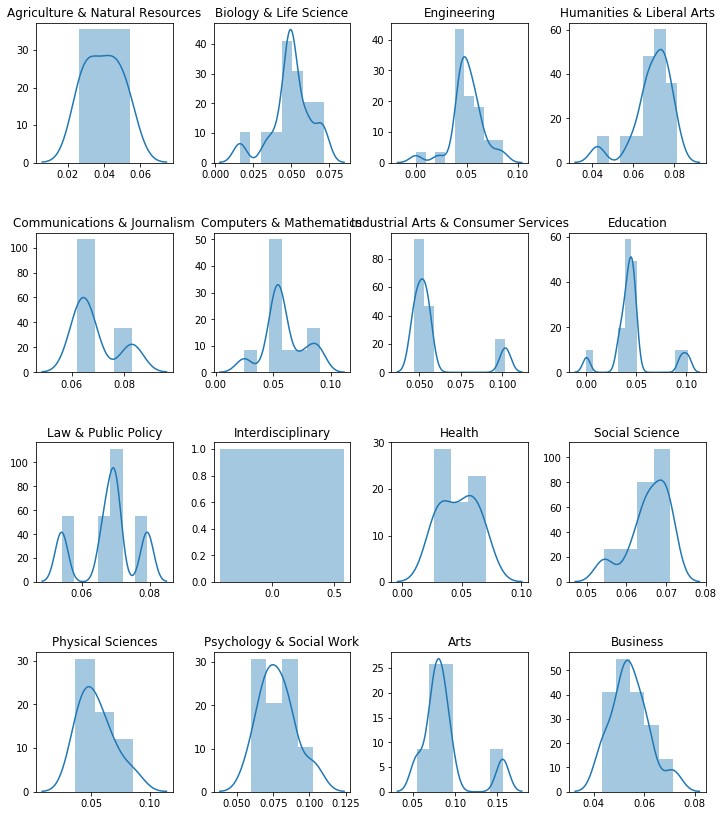

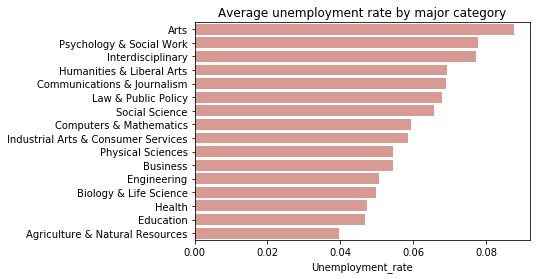

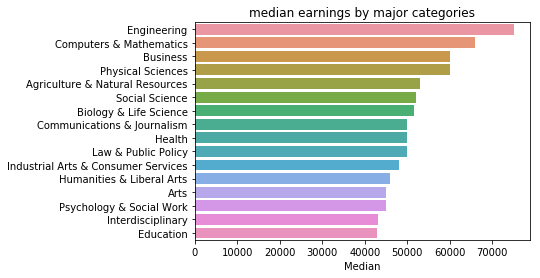

summary of statistics of Unemployment_rate:
count    173.000000
mean       0.057355
std        0.019177
min        0.000000
25%        0.046261
50%        0.054719
75%        0.069043
max        0.156147
Name: Unemployment_rate, dtype: float64


In [2]:
ua1 = UnemployedAnalysis()

# load data
all_ages = ua1.load_data('./source_data/all-ages.csv')

# plot distributions of unemployment rate of each major category
ua1.plot_unemployment_rate_distribution(all_ages)

# plot average unemployment rate of each major category
ua1.plot_unemployment_by_majorCat(all_ages) 

# plot median payment of each major category
ua1.get_median_payment_by_majorCat(all_ages)

# get max, min, median as well as other statistics of unemployment_rate
print('summary of statistics of Unemployment_rate:')
print(all_ages['Unemployment_rate'].describe())

In [3]:
# look into each major category
# you may change major category name accordingly to get more detailed insights in terms of its sub-majors
print(ua1.get_major_by_majorCat('Agriculture & Natural Resources'))
print('---')
ua1.sort_unemployment_in_majorCat('Agriculture & Natural Resources')

Agriculture & Natural Resources major category contains these majors:
['GENERAL AGRICULTURE', 'AGRICULTURE PRODUCTION AND MANAGEMENT', 'AGRICULTURAL ECONOMICS', 'ANIMAL SCIENCES', 'FOOD SCIENCE', 'PLANT SCIENCE AND AGRONOMY', 'SOIL SCIENCE', 'MISCELLANEOUS AGRICULTURE', 'FORESTRY', 'NATURAL RESOURCES MANAGEMENT']
---
unemployment rate for each major in Agriculture & Natural Resources:


,Major_category,Major,Unemployment_rate
7,Agriculture & Natural Resources,NATURAL RESOURCES MANAGEMENT,0.054341
9,Agriculture & Natural Resources,SOIL SCIENCE,0.050867
3,Agriculture & Natural Resources,FOOD SCIENCE,0.049188
2,Agriculture & Natural Resources,ANIMAL SCIENCES,0.042679
4,Agriculture & Natural Resources,FORESTRY,0.042563
6,Agriculture & Natural Resources,MISCELLANEOUS AGRICULTURE,0.039230
8,Agriculture & Natural Resources,PLANT SCIENCE AND AGRONOMY,0.031791
0,Agriculture & Natural Resources,AGRICULTURAL ECONOMICS,0.030248
1,Agriculture & Natural Resources,AGRICULTURE PRODUCTION AND MANAGEMENT,0.028636
5,Agriculture & Natural Resources,GENERAL AGRICULTURE,0.026147


<h3> Task 2: explore recent trends of college majors

In [4]:
def plot_total_by_category(data, title):
    major_cat_total = data[['Major_category','Total']].groupby(['Major_category']).sum().reset_index()
    major_cat_total = major_cat_total.sort_values('Total', ascending = False)
    sns.barplot(y = 'Major_category',x ='Total', data = major_cat_total, palette = 'colorblind')
    plt.title(title)
    plt.show()

def plot_total_by_major(data, title):
    '''plot total by different majors '''
    major_total = data[['Major','Total']].groupby(['Major']).sum().reset_index()
    # select the top 20 majors with most popularity
    major_total = major_total.sort_values('Total', ascending = False).head(20)
    sns.barplot(y = 'Major',x ='Total', data = major_total, palette = 'colorblind')
    plt.title(title)
    plt.show()

def plot_total_by_major(data, title):
    ''' plot total by different majors '''
    major_total = data[['Major','Total']].groupby(['Major']).sum().reset_index()
    # select the top 20 majors with most popularity
    major_total = major_total.sort_values('Total', ascending = False).head(20)
    sns.barplot(y = 'Major',x ='Total', data = major_total, palette = 'colorblind')
    plt.title(title)
    plt.show()

def plot_piechart_total(data, title):
    '''plot piechart of sum of total by major categories '''
    total_sum = data.Total.sum()
    df = data[['Major','Major_category','Total']].groupby(['Major_category']).sum().reset_index()
    df['Percentage'] = df['Total'].apply(lambda x: x/total_sum)
    # plot pie chart
    labels = list(df.Major_category.values)
    sizes = list(df.Total.values)
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.axis('equal')
    plt.title(title)
    plt.show()

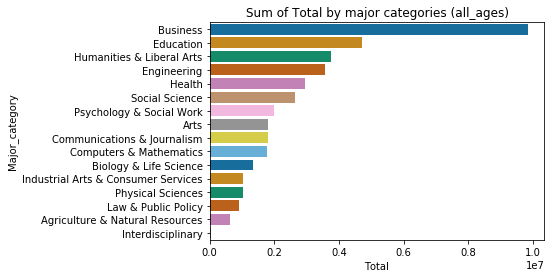

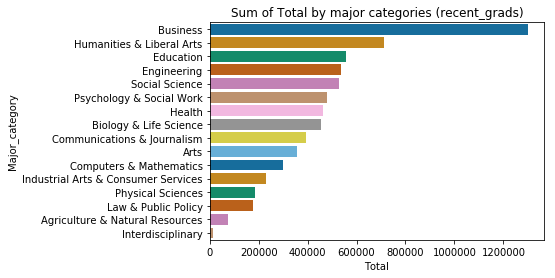

In [5]:
recent_grads = pd.read_csv('./source_data/recent-grads.csv')
plot_total_by_category(all_ages, 'Sum of Total by major categories (all_ages)')
plot_total_by_category(recent_grads,'Sum of Total by major categories (recent_grads)')

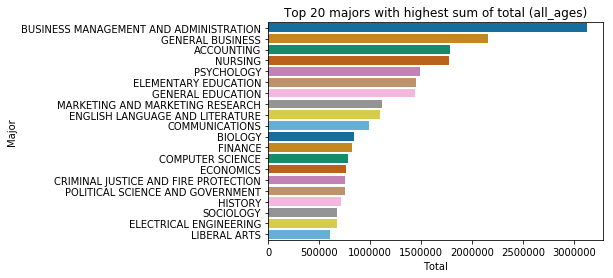

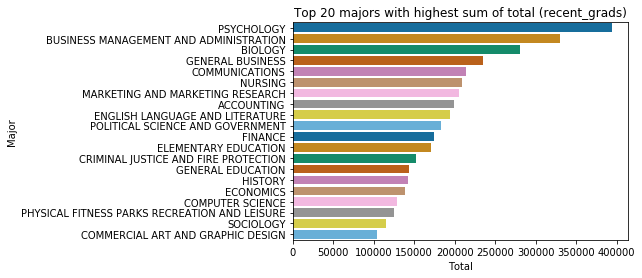

In [6]:
plot_total_by_major(all_ages, 'Top 20 majors with highest sum of total (all_ages)')
plot_total_by_major(recent_grads, 'Top 20 majors with highest sum of total (recent_grads)')

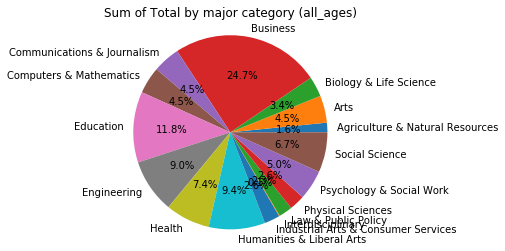

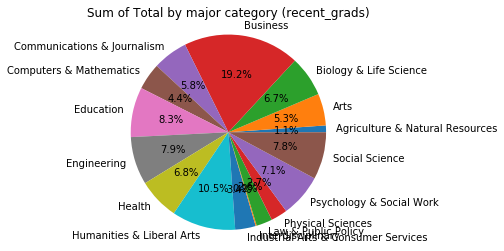

In [7]:
plot_piechart_total(all_ages,'Sum of Total by major category (all_ages)')
plot_piechart_total(recent_grads,'Sum of Total by major category (recent_grads)')

<h3> More exploration: major categories by genders

In [8]:
def plot_major_categories_of_women(data, title):
    data_by_majorCat = data[['ShareWomen','Major_category']].groupby(['Major_category']).mean().sort_values(['ShareWomen'], ascending= False).reset_index()
    # ploting
    ax = sns.barplot(y = 'ShareWomen', x = 'Major_category', data = data_by_majorCat, palette = 'rocket')
    plt.xticks(rotation = 40)
    plt.title(title)
    plt.show()

def compare_majorCat_by_gender(data,title):
    '''compare the total counts of male and female in different STEM-field major categories'''
    men_data = data[['Major','Major_category','Men']]
    men_data = men_data.groupby(['Major_category']).mean()
    men_data = men_data.reset_index()
    men_data = men_data.rename(columns = {'Men':'Counts'})
    men_data['Gender'] = 'men'
    # handle women data
    women_data = data[['Major_category','Women']]
    women_data = women_data.groupby(['Major_category']).mean()
    women_data = women_data.reset_index()
    women_data = women_data.rename(columns = {'Women':'Counts'})
    women_data['Gender'] = 'women'
    # concat women and men data
    joined_sex_data = pd.concat([men_data,women_data]).reset_index(drop=True)
    # plotting
    sns.barplot(x = 'Counts', y='Major_category', data = joined_sex_data, hue = 'Gender')
    plt.title(title)
    plt.show()

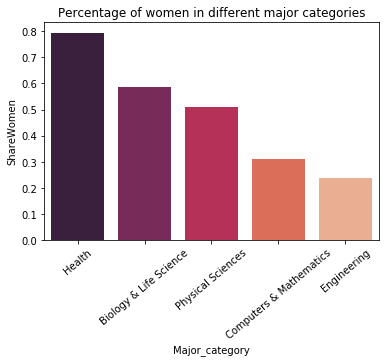

In [9]:
women_stem = pd.read_csv('./source_data/women-stem.csv')
plot_major_categories_of_women(women_stem, 'Percentage of women in different major categories')    

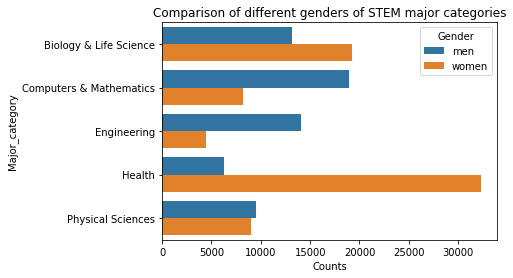

In [10]:
compare_majorCat_by_gender(women_stem,'Comparison of different genders of STEM major categories')